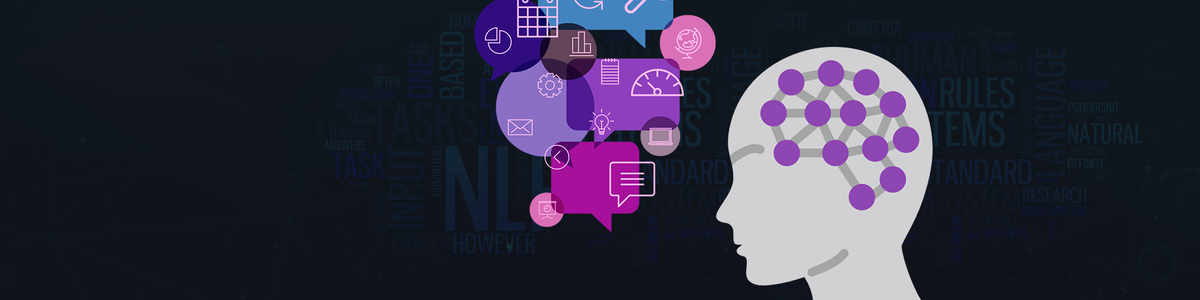

In [1]:
'''Identify the Sentiments'''

from PIL import Image
read_image=Image.open('/home/kumar/Documents/JanataHack: NLP Hackathon/NLP_Hackathon-thumbnail-1200x1200.png')
read_image


Sentiment Analysis for Steam Reviews
Steam is a video game digital distribution service with a vast community of gamers globally. A lot of gamers write reviews at the game page and have an option of choosing whether they would recommend this game to others or not. However, determining this sentiment automatically from text can help Steam to automatically tag such reviews extracted from other forums across the internet and can help them better judge the popularity of games.

Given the review text with user recommendation and other information related to each game for 64 game titles, the task is to predict whether the reviewer recommended the game titles available in the test set on the basis of review text and other information.


About Data Source:
Steam Platform

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
ps=PorterStemmer()


In [148]:
Train=pd.read_csv('/home/kumar/Documents/JanataHack: NLP Hackathon/train_E52nqFa/train.csv')
Train.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [5]:
x=Train.user_review.values
y=Train.user_suggestion.values

In [8]:
Train.shape

(17494, 5)

In [9]:
x.shape,y.shape

((17494,), (17494,))

In [11]:
wnl=WordNetLemmatizer()
corpus_Train=[]
for i in range(0,len(Train)):
    review=re.sub('[^a-zA-Z]',' ',x[i])
    review=review.lower()
    review=review.split()
    review=[wnl.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    review=" ".join(review)
    corpus_Train.append(review)

In [12]:
corpus_Train

['scared hearing creepy voice pause moment write review wait heart beat return atleast somewhat calmer time game adorable creepy like happy tree friend graphic sceme childhood bubble clean hello charactes isnot trying kill likable bit odd noob thing though oh look class room full ghost dead child let shine flashlight stand staring hmm creepy music turn around see see chasing never game afraid finding locked door',
 'best game better sam pepper youtube account need play computersome extra pant pro scary hell fun adventure spooky forgot mention scary hell get pant brief wardrobe time consuming bored con buying pant brief downloaded yet',
 'littly iffy control know play easy master made floor due certain circumstance unable finish game related worry bug glitch antyhing highly recommend casual play maybe friend two watching hilarity ensues especially hit floor fun fellow fleshlings',
 'great game fun colorful side note though getting windowed mode computer hate fullscreen yeah computer lik

In [101]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
TFIDF=TfidfVectorizer(max_features=27980)

In [123]:
x=TFIDF.fit_transform(corpus_Train)

In [124]:
x.shape

(17494, 27980)

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [127]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12245, 27980), (5249, 27980), (12245,), (5249,))

In [128]:
import xgboost
from xgboost import XGBClassifier

In [129]:
xgb=XGBClassifier()

In [130]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [131]:
ypred_xgb=xgb.predict(x_test)

In [132]:
from sklearn.metrics import classification_report

In [133]:
report=classification_report(ypred_xgb,y_test)

In [134]:
print(report)

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2026
           1       0.88      0.82      0.85      3223

    accuracy                           0.82      5249
   macro avg       0.81      0.82      0.81      5249
weighted avg       0.83      0.82      0.82      5249



In [135]:
Test=pd.read_csv('/home/kumar/Documents/JanataHack: NLP Hackathon/test_BppAoe0/test.csv')
Test.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...


In [136]:
test_x=Test['user_review'].values

In [137]:
test_x.shape

(8045,)

In [138]:
wnl=WordNetLemmatizer()
corpus_Test=[]
for i in range(0,len(Test)):
    review=re.sub('[^a-zA-Z]',' ',test_x[i])
    review=review.lower()
    review=review.split()
    review=[wnl.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    review=" ".join(review)
    corpus_Test.append(review)

In [139]:
corpus_Test

['nice graphic new map weapon model developer listen customer bit developer focused much thing important focus changing tick rate match making server improving vac lot two customer really want focus sticker ui hud change skin stop messing around weapon',
 'would recommend getting current state csgo hit rock bottom valve missed promise game changing update lack effort combat terrible cheating problem bug game year still fixed cheating control past year playing cheating gotten worse worse point end playing cheater almost every game valve implemented new trust matchmaking system combat issue lackluster algorithm still somehow think putting year gameplay hour people playing brand new account make sense really know still put effort play game anymore usually end regretting guess wish could somehow fun used playing game seems day long gone',
 'edit tried playing c go recently dramatically gotten worse player openly obviously cheating even saying chat wall aim people clean spraying wall even d

In [140]:
test_x=TFIDF.fit_transform(corpus_Test)

In [141]:
test_x.shape

(8045, 27980)

In [142]:
ypred_xgb_Test=xgb.predict(test_x)

In [143]:
ypred_xgb_Test

array([1, 0, 1, ..., 0, 1, 1])

In [144]:
data=Test['review_id']

In [145]:
dataset = pd.DataFrame({'review_id': data, 'user_suggestion': ypred_xgb_Test})
dataset.head()

,review_id,user_suggestion
0,1603,1
1,1604,0
2,1605,1
3,1606,1
4,1607,1


In [146]:
dataset.to_csv('/home/kumar/Documents/JanataHack: NLP Hackathon/Submission_Kumar_Gaurav.csv')